<a href="https://colab.research.google.com/github/olaidekashimawo/-Gun-Death-Rate-Predictions-/blob/main/Gun_Death_Rate_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gun Death Rate Predictions
Olaide Kashimawo
- Personal project

Based on the dataset provided, it appears to contain information about gun deaths in the United States from 2019 to 2023 from CDC.gov, with the data broken down by month and showing annual rates per 100,000 population for each year.

### Problem Statement:
The primary goal is to analyze trends in gun-related deaths in the United States over the period from 2019 to 2023. We want to understand the following aspects:

1. Trend Analysis: Identify how gun death rates have changed over the years.
2. Seasonal Patterns: Examine if there are specific months or seasons where gun death rates are consistently higher or lower.
3. Forecasting: Use machine learning techniques to forecast the gun death rates for future months or years.

### Data Visualization:
Annual Trend: A line chart showing the annual gun death rates from 2019 to 2023.
Monthly Pattern: A heat map or a line chart displaying monthly variations in gun death rates for each year.





### Machine Learning Application:
We can employ a time series forecasting model such as ARIMA (Autoregressive Integrated Moving Average) or LSTM (Long Short-Term Memory neural networks) to predict future gun death rates based on historical data.

### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Gun_data = pd.read_csv('/content/data-table.csv')
Gun_data.head()

,Month,"2019 (Annual rate = 4.39/100,000)","2020 (Annual rate = 5.84/100,000)","2021 (Annual rate = 6.32/100,000)","2022 (*Provisional; Annual rate = 5.90/100,000)","2023 (**Partial and Provisional; Annual rate YTD = 5.49/100,000)"
0,January,4.15,4.54,6.05,5.76,5.54
1,February,3.99,4.18,5.64,5.53,5.04
2,March,3.83,4.50,5.43,5.41,5.02
3,April,4.00,4.89,6.03,5.99,5.39
4,May,4.40,5.66,6.75,6.38,5.80


In [3]:
Gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Month                                                             12 non-null     object 
 1   2019 (Annual rate = 4.39/100,000)                                 12 non-null     float64
 2   2020 (Annual rate = 5.84/100,000)                                 12 non-null     float64
 3   2021 (Annual rate = 6.32/100,000)                                 12 non-null     float64
 4   2022 (*Provisional; Annual rate = 5.90/100,000)                   12 non-null     float64
 5   2023 (**Partial and Provisional; Annual rate YTD = 5.49/100,000)  8 non-null      float64
dtypes: float64(5), object(1)
memory usage: 704.0+ bytes


In [4]:
Gun_data.describe()

,"2019 (Annual rate = 4.39/100,000)","2020 (Annual rate = 5.84/100,000)","2021 (Annual rate = 6.32/100,000)","2022 (*Provisional; Annual rate = 5.90/100,000)","2023 (**Partial and Provisional; Annual rate YTD = 5.49/100,000)"
count,12.000000,12.000000,12.000000,12.000000,8.000000
mean,4.391667,5.835833,6.310000,5.900000,5.486250
std,0.326408,1.022328,0.522111,0.444665,0.351728
min,3.830000,4.180000,5.430000,5.320000,5.020000
25%,4.112500,4.802500,5.995000,5.500000,5.272500
50%,4.475000,6.405000,6.300000,5.850000,5.465000
75%,4.637500,6.675000,6.757500,6.237500,5.785000
max,4.820000,6.870000,7.000000,6.640000,5.970000


###Data Cleaning

In [5]:
# Convert Month to a datetime object for easier manipulation
Gun_data['Month'] = pd.to_datetime(Gun_data['Month'], format='%B').dt.month_name()
Gun_data.head()
# It's better to keep the month as a numerical value for time series analysis
# No further conversion to month names is necessary

,Month,"2019 (Annual rate = 4.39/100,000)","2020 (Annual rate = 5.84/100,000)","2021 (Annual rate = 6.32/100,000)","2022 (*Provisional; Annual rate = 5.90/100,000)","2023 (**Partial and Provisional; Annual rate YTD = 5.49/100,000)"
0,January,4.15,4.54,6.05,5.76,5.54
1,February,3.99,4.18,5.64,5.53,5.04
2,March,3.83,4.50,5.43,5.41,5.02
3,April,4.00,4.89,6.03,5.99,5.39
4,May,4.40,5.66,6.75,6.38,5.80


In [6]:
# Reshape the data for easier analysis
reshaped_data = Gun_data.melt(id_vars=['Month'], var_name='Year', value_name='Death Rate')
reshaped_data['Year'] = reshaped_data['Year'].str.extract('(\d{4})').astype(int)
reshaped_data.head()


,Month,Year,Death Rate
0,January,2019,4.15
1,February,2019,3.99
2,March,2019,3.83
3,April,2019,4.00
4,May,2019,4.40


In [7]:
# Check for missing values
missing_values = reshaped_data.isnull().sum()
print(missing_values)

Month         0
Year          0
Death Rate    4
dtype: int64


In [8]:
# prompt: fill death rate

# Fill missing values with the mean
reshaped_data['Death Rate'].fillna(reshaped_data['Death Rate'].mean(), inplace=True)

# Check for missing values again
missing_values = reshaped_data.isnull().sum()
print(missing_values)


Month         0
Year          0
Death Rate    0
dtype: int64


### Data Exploration

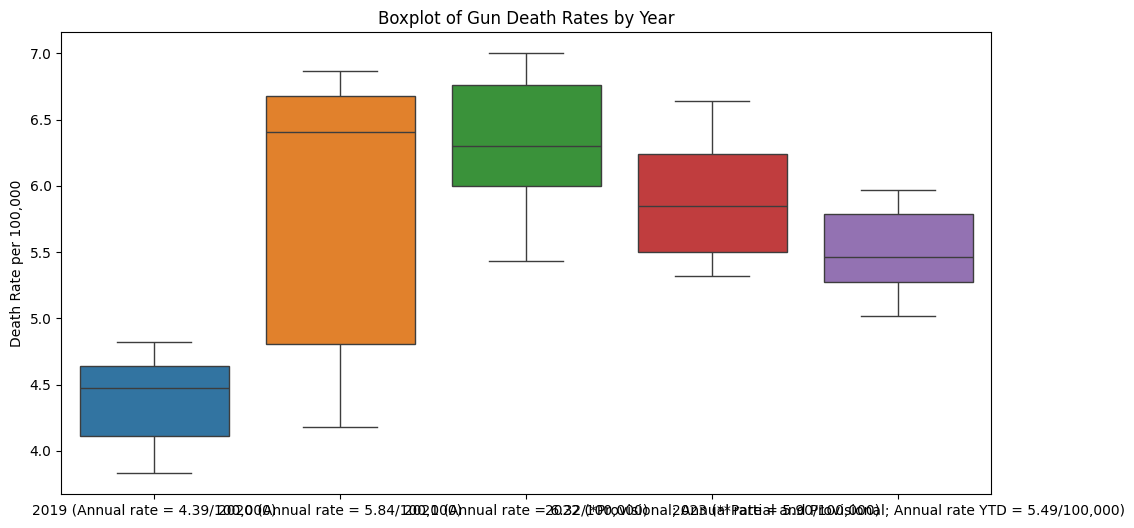

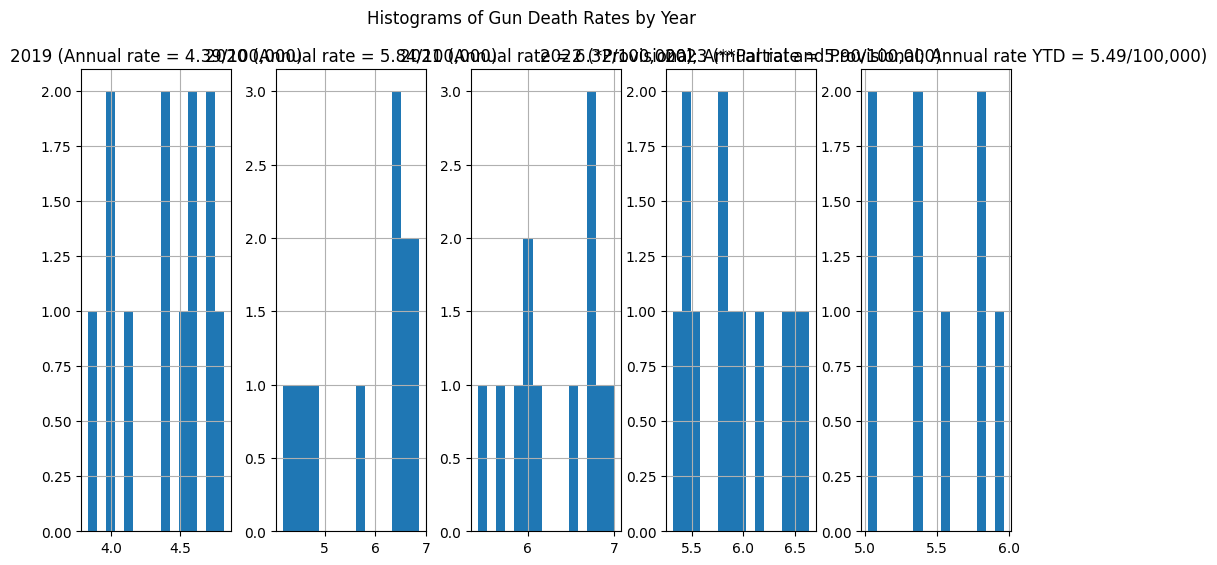

In [9]:
# Box plot for each year to see the distribution and identify any outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=Gun_data.iloc[:, 1:])
plt.title('Boxplot of Gun Death Rates by Year')
plt.ylabel('Death Rate per 100,000')
plt.show()

# Histograms for the overall distribution
Gun_data.iloc[:, 1:].hist(bins=15, figsize=(12, 6), layout=(1, -1))
plt.suptitle('Histograms of Gun Death Rates by Year')
plt.show()

In [10]:
# Descriptive statistics
statistics = reshaped_data.describe()
print(statistics)

              Year  Death Rate
count    60.000000   60.000000
mean   2021.000000    5.591786
std       1.426148    0.864805
min    2019.000000    3.830000
25%    2020.000000    4.872500
50%    2021.000000    5.615893
75%    2022.000000    6.385000
max    2023.000000    7.000000


#### Plotting the trends

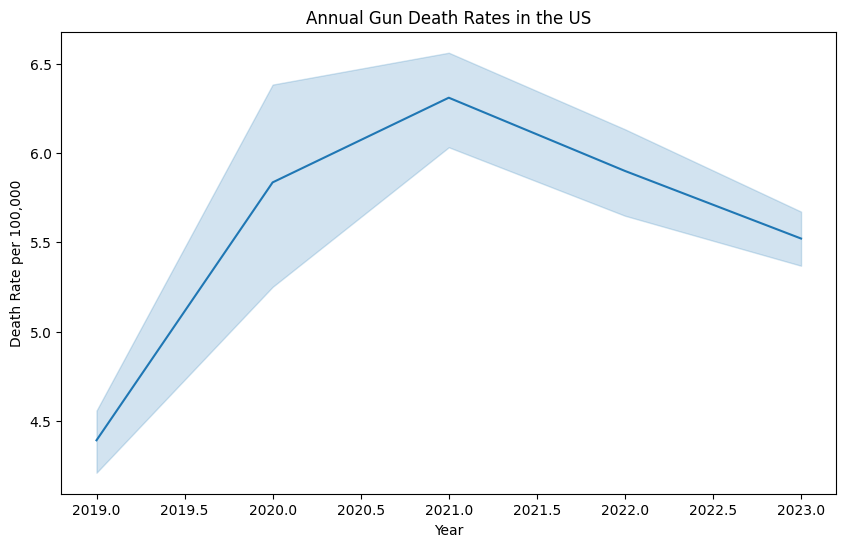

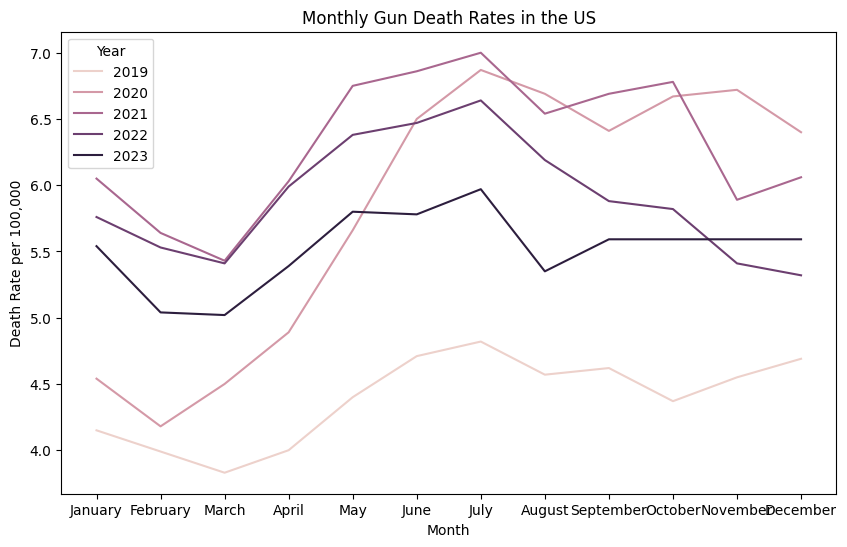

In [11]:
fig, axes = plt.subplots(figsize=(10, 6))
sns.lineplot(data=reshaped_data, x='Year', y='Death Rate', ax=axes)
plt.title('Annual Gun Death Rates in the US')
plt.xlabel('Year')
plt.ylabel('Death Rate per 100,000')
plt.show()

# Monthly pattern
fig, axes = plt.subplots(figsize=(10, 6))
sns.lineplot(data=reshaped_data, x='Month', y='Death Rate', hue='Year')
plt.title('Monthly Gun Death Rates in the US')
plt.xlabel('Month')
plt.ylabel('Death Rate per 100,000')
plt.show()

 ### Machine Learning: Time Series Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 0.06741369984942248


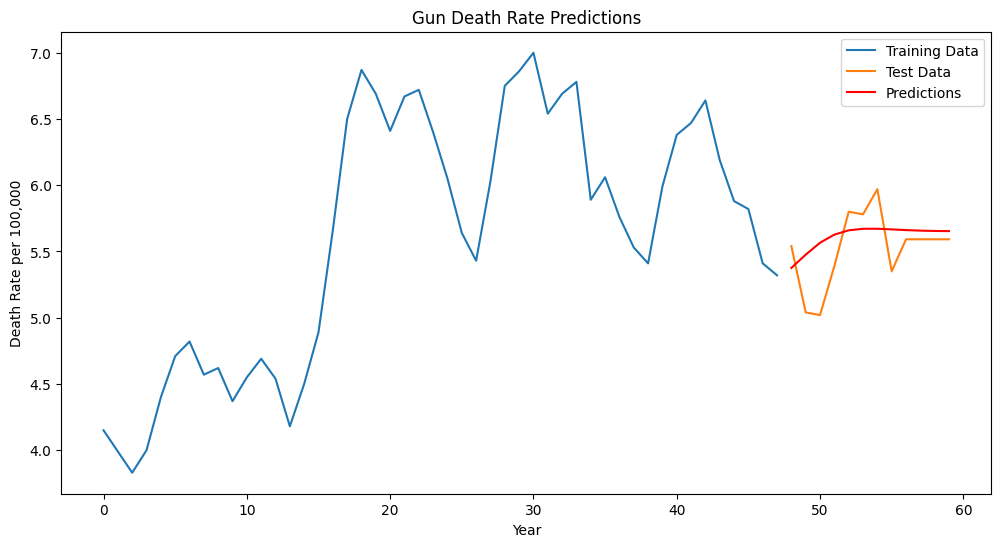

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ensure reshaped_data is defined with 'Year' and 'Death Rate' columns
# Add checks for 'Year' and 'Death Rate' columns
if 'Year' not in reshaped_data or 'Death Rate' not in reshaped_data:
    raise KeyError("The required columns do not exist in the dataframe.")

# Convert 'Year' to integer if it's not already
reshaped_data['Year'] = reshaped_data['Year'].astype(int)

# Select the 'Death Rate' for the last complete year as test data
train_data = reshaped_data[reshaped_data['Year'] < 2023]['Death Rate']
test_data = reshaped_data[reshaped_data['Year'] == 2023]['Death Rate']

# Fit the ARIMA model to the training data
# Consider using pmdarima.auto_arima to find the best (p,d,q) parameters
model = ARIMA(train_data, order=(2, 1, 1))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.get_forecast(steps=len(test_data)).predicted_mean

# Evaluate the model performance
error = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {error}')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.title('Gun Death Rate Predictions')
plt.xlabel('Year')
plt.ylabel('Death Rate per 100,000')
plt.legend()
plt.show()





*   Training Data (Blue Line): This represents the historical data used to train the model
*   Test Data (Orange Line): These points are the actual recorded death rates that the model has not seen and is supposed to predict.
*    Predictions (Red Line): This line shows the death rates as predicted by the model based on the training data.



### Analysis of the Results:
The model's predictions follow the general downward trend seen in the test data, indicating it has some predictive power.
However, the model does not seem to capture the sharp fluctuations seen in the actual test data, which suggests that it may not be responding well to more rapid changes in the death rates.

#### Recommendations:
Model Refinement:
Investigate if adding more data, using a different model, or adjusting the current model's parameters could improve the forecast's accuracy, especially in capturing the fluctuations.
####Policy Review:

Analyze the policies in place during the time frame of the test data where the decrease in death rates is observed. Identifying effective policies or interventions can lead to a better understanding of what contributes to lowering gun deaths.

####Targeted Interventions:
Considering the model predicts a decrease, identify if there are particular sub-groups or regions where this decrease is not as significant. Target interventions and resources to those areas that may not be experiencing the general trend.